In [126]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
PATH = Path().parent
DDIR = PATH / 'datasets'

In [128]:
df = pd.read_csv(f'{DDIR}/Melbourne_housing_FULL.csv')

In [129]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15448,Bayswater,1/20 Church St,2,u,520000.0,S,Schroeder,17/06/2017,23.2,3153.0,...,1.0,1.0,418.0,76.0,1970.0,Knox City Council,-37.83777,145.26345,Eastern Metropolitan,5030.0
12237,Bentleigh,24 Sunnyside Gr,3,h,NaN,S,Buxton,13/05/2017,13.0,3204.0,...,2.0,2.0,326.0,149.0,2005.0,Glen Eira City Council,-37.91890,145.02830,Southern Metropolitan,6795.0
15462,Bentleigh East,26 May St,3,h,1525000.0,PI,Buxton,17/06/2017,13.8,3165.0,...,1.0,3.0,581.0,128.0,1940.0,Glen Eira City Council,-37.91780,145.05414,Southern Metropolitan,10969.0
32881,Sunshine North,22 Ford Av,3,h,600000.0,VB,Barry,17/02/2018,10.5,3020.0,...,NaN,NaN,NaN,NaN,NaN,Brimbank City Council,NaN,NaN,Western Metropolitan,4217.0
30077,Bayswater,4/12 Armstrong Rd,2,t,646000.0,S,Philip,9/12/2017,23.2,3153.0,...,NaN,NaN,NaN,NaN,NaN,Knox City Council,NaN,NaN,Eastern Metropolitan,5030.0


<h3>Cari informasi terkait data</h3>

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

<P><b>Cek null pada data</b></P>

In [131]:
list_columns = df.columns 
tmp_df = pd.DataFrame(columns=['Column','Percentage', 'number_missing', 'datatype'])
for x in list_columns:
    null_count = df[x].isnull().sum()
    tmp_df.loc[len(tmp_df)] = [x,f'{round(null_count/df.shape[0]*100, ndigits=2)} %',null_count,df[x].dtypes]

tmp_df.set_index('Column',inplace=True)
tmp_df.sort_values(by='Percentage', ascending=False, inplace=True)
tmp_df

,Percentage,number_missing,datatype
Column,,,
BuildingArea,60.58 %,21115,float64
YearBuilt,55.39 %,19306,float64
Landsize,33.88 %,11810,float64
Car,25.04 %,8728,float64
Bathroom,23.6 %,8226,float64
Bedroom2,23.57 %,8217,float64
Longtitude,22.88 %,7976,float64
Lattitude,22.88 %,7976,float64
Price,21.83 %,7610,float64


<p><b>Baik sekarang kita dapat melihat persentase null pada tiap kolom, ada beberapa kolom dengan data null yang besar (diatas 20%), diantaranya</b><br>
1. BuildingArea<br>
2. YearBuilt<br>
3. LandSize<br>
4. Car<br>
5. Bathroom<br>
6. Bathroom2<br>
7. Longitude<br>
8. Latitude<br>
9. Price<br>
</p>

<p>Persentase null yang besar bukan berarti data tersebut harus dihilangkan, mari kita lihat dahulu apakah data tersebut dapat diselamatkan atau tidak dengan imputer, terutama target (Price)</p>

In [132]:
df.Price.fillna(method='bfill', inplace=True)
df.Price = df.Price.div(100)
#Impute dara price menggunakan metode backward fill agar distribusi data tetap stabil.
df.Price.sort_values(ascending=True)

4378        850.0
29669      1120.0
17529      1210.0
3063       1310.0
3290       1450.0
           ...   
28332     70000.0
15696     76500.0
12539     80000.0
19583     90000.0
25635    112000.0
Name: Price, Length: 34857, dtype: float64

<h3>Cek Target</h3>

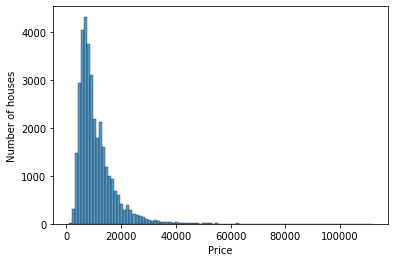

In [136]:
# df.Price.hist(bins=100, density=True)
sns.histplot(x=df.Price, bins=100)
plt.ylabel(ylabel='Number of houses')
plt.xlabel(xlabel='Price')
plt.show()

<p>Dengan data diatas kita dapat mengetahui bahwa harga rumah kebanyakan</p>